<a href="https://colab.research.google.com/github/rbutti/machine-learning-cohort/blob/main/MidCourseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will use the New York City Airbnb Open Data:

https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv

We'll be working with the 'price' variable, and we'll transform it to a classification task.

In [ ]:
#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Machine Learming Model
#Metrics
from sklearn.metrics import mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#Linear Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

#Ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Others
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier






In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv")
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
40056,31101814,Stylish & Spacious Private Room + Bath in Bed-...,229109330,Alejandra,Brooklyn,Bedford-Stuyvesant,40.68441,-73.94632,Private room,100,2,0,NaN,NaN,1,31
24839,19923377,Cozy Brightly Lit Room in Huge Loft Space,48081884,Laura,Brooklyn,Williamsburg,40.70476,-73.92942,Private room,65,3,15,2019-05-27,0.65,2,2
26102,20817614,Room o4,74633496,Justine,Bronx,University Heights,40.85751,-73.90805,Private room,45,3,12,2019-05-26,0.54,5,365
42016,32643993,XL Private 3 bedroom Full floor E. Village Apt!,160356,Joseph,Manhattan,East Village,40.72530,-73.98401,Entire home/apt,250,1,5,2019-06-20,1.47,4,233
33198,26198112,Designer apartment on Riverside Dr-Upper West ...,196900738,Kimberley,Manhattan,Upper West Side,40.79801,-73.97403,Entire home/apt,400,1,0,NaN,NaN,1,0


In [ ]:
len(df)


48895

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [ ]:
# Selecting Required Features
df=df[['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [ ]:
#Let's create a variable above_average which is 1 if the price is above (or equal to) 152.
# Create a new column 'above_average'
df['above_average'] = (df['price'] >= 152).astype(int)

<ipython-input-234-50303deeda24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average'] = (df['price'] >= 152).astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# Fill in the missing values with 0.
df.fillna(0, inplace=True)

<ipython-input-236-feaef9df9824>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# calculate the mode for the 'neighbourhood_group' column
df['neighbourhood_group'].mode()[0]

'manhattan'

# Question 1

Question 1: What is the most frequent observation (mode) for the column 'neighbourhood_group'?

Answer: **Manhattan**

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
above_average                     0
dtype: int64

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split. Seed set to 42
x_train, x_test = train_test_split(df, test_size=0.2, random_state=41)

len(x_train), len(x_test)
# Replace nulls with 0's - these are pandas dataframes
x_train = x_train.fillna(0)

x_test = x_test.fillna(0)
len(x_train),len(x_test)

(39116, 9779)

In [ ]:
# X = input, Y = output
# Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (x_train.above_average).values
y_test = (x_test.above_average).values

#Make sure the target value is not in your dataframe
del x_train['above_average']
del x_test['above_average']

#Make sure the price value is not in your dataframe as it impact target value
del x_train['price']
del x_test['price']

In [ ]:
len(y_train),len(y_test)

(39116, 9779)

In [ ]:
x_train.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 41158 to 34752
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   room_type                       39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   minimum_nights                  39116 non-null  int64  
 5   number_of_reviews               39116 non-null  int64  
 6   reviews_per_month               39116 non-null  float64
 7   calculated_host_listings_count  39116 non-null  int64  
 8   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
# numerical features of your train dataset.
x_train_num = x_train[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [ ]:
x_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 41158 to 34752
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        39116 non-null  float64
 1   longitude                       39116 non-null  float64
 2   minimum_nights                  39116 non-null  int64  
 3   number_of_reviews               39116 non-null  int64  
 4   reviews_per_month               39116 non-null  float64
 5   calculated_host_listings_count  39116 non-null  int64  
 6   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 MB


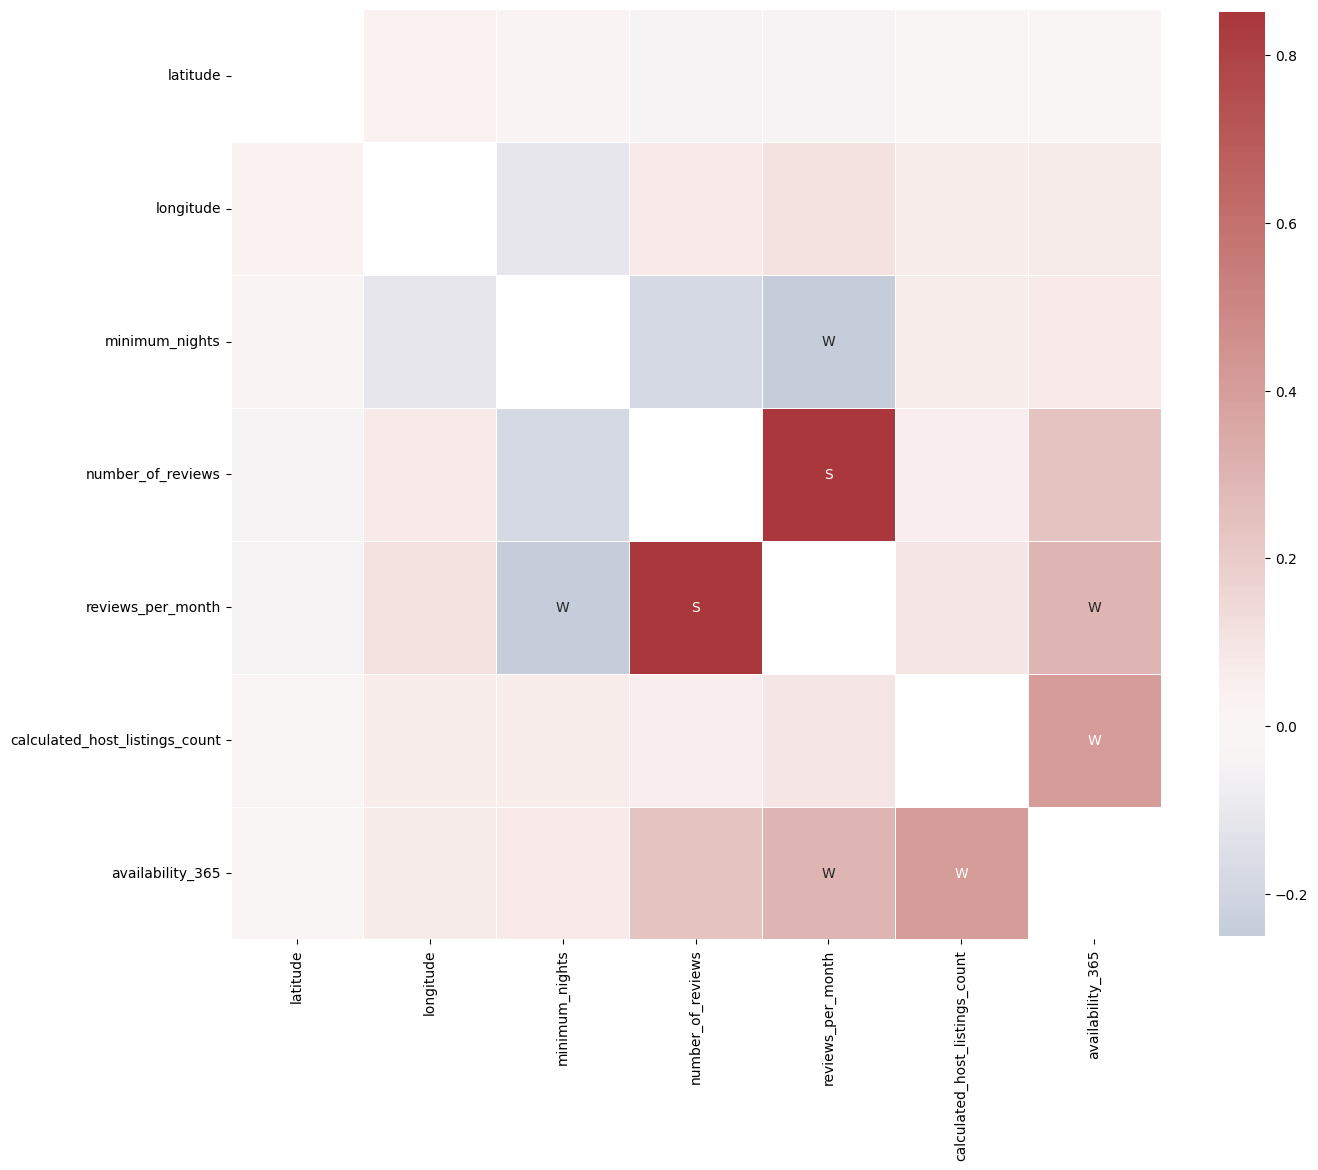

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity
# Create the correlation matrix for the numerical features of your train dataset.

# Computes feature correlation
x_corr = x_train.corr(method="spearman") # pearson assumes a linear relationship... spearman does not

# Create labels for the correlation matrix
labels = np.where(np.abs(x_corr)>0.75, "S",
                  np.where(np.abs(x_corr)>0.5, "M",
                           np.where(np.abs(x_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(x_corr, mask=np.eye(len(x_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
x_corr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.034311,0.020668,-0.044097,-0.043096,0.000592,-0.005900
longitude,0.034311,1.000000,-0.115907,0.080479,0.109820,0.065841,0.069835
minimum_nights,0.020668,-0.115907,1.000000,-0.178377,-0.250848,0.062987,0.075373
number_of_reviews,-0.044097,0.080479,-0.178377,1.000000,0.850998,0.055085,0.237626
reviews_per_month,-0.043096,0.109820,-0.250848,0.850998,1.000000,0.094201,0.297894
calculated_host_listings_count,0.000592,0.065841,0.062987,0.055085,0.094201,1.000000,0.406144
availability_365,-0.005900,0.069835,0.075373,0.237626,0.297894,0.406144,1.000000


In [ ]:
# Find the highest correlation values between features
highest_corr = x_corr.unstack().sort_values(ascending=False).drop_duplicates()
highest_corr[1:3]

number_of_reviews  reviews_per_month                 0.850998
availability_365   calculated_host_listings_count    0.406144
dtype: float64

# Question 2

What are the two features that have the biggest correlation in this dataset?

number_of_reviews  reviews_per_month                 **0.850998**

availability_365   calculated_host_listings_count    **0.406144**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,private_room,40.64749,-73.97237,149,1,9,0.21,6,365,0
1,manhattan,entire_home/apt,40.75362,-73.98377,225,1,45,0.38,2,355,1
2,manhattan,private_room,40.80902,-73.94190,150,3,0,0.00,1,365,0
3,brooklyn,entire_home/apt,40.68514,-73.95976,89,1,270,4.64,1,194,0
4,manhattan,entire_home/apt,40.79851,-73.94399,80,10,9,0.10,1,0,0


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 41158 to 34752
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   room_type                       39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   minimum_nights                  39116 non-null  int64  
 5   number_of_reviews               39116 non-null  int64  
 6   reviews_per_month               39116 non-null  float64
 7   calculated_host_listings_count  39116 non-null  int64  
 8   availability_365                39116 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB


In [ ]:
# Calculate the mutual information score for the 'neighbourhood_group' feature
mi_neighbourhood = mutual_info_score(x_train['neighbourhood_group'], y_train)

# Calculate the mutual information score for the 'room_type' feature
mi_room_type = mutual_info_score(x_train['room_type'], y_train)

# Print the results rounded to 2 decimal digits
print(f"Mutual information score for 'neighbourhood_group': {round(mi_neighbourhood, 2)}")
print(f"Mutual information score for 'room_type': {round(mi_room_type, 2)}")

Mutual information score for 'neighbourhood_group': 0.05
Mutual information score for 'room_type': 0.14


# Question 3

Which of these two variables has a bigger score?

Mutual information score for 'room_type': 0.14


In [ ]:
#Remember that we have two categorical variables in the data. Include them using one-hot encoding.
# Define the columns to be one-hot encoded
categorical_features = ["neighbourhood_group", "room_type"]

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), x_train.select_dtypes(include=["int", "float"]).columns),
        ("cat", OneHotEncoder(), categorical_features)
    ])

# Fit and transform the training set
x_train_preprocessed = preprocessor.fit_transform(x_train)

# Transform the testing set
x_test_preprocessed = preprocessor.transform(x_test)

In [ ]:
# Define the logistic regression model
#To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [ ]:
# Fit the pipeline on the training dataset
model.fit(x_train_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Calculate the accuracy on the validation dataset
y_pred = model.predict(x_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.8023315267409755

In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[5921  883]
 [1050 1925]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6804
           1       0.69      0.65      0.67      2975

    accuracy                           0.80      9779
   macro avg       0.77      0.76      0.76      9779
weighted avg       0.80      0.80      0.80      9779



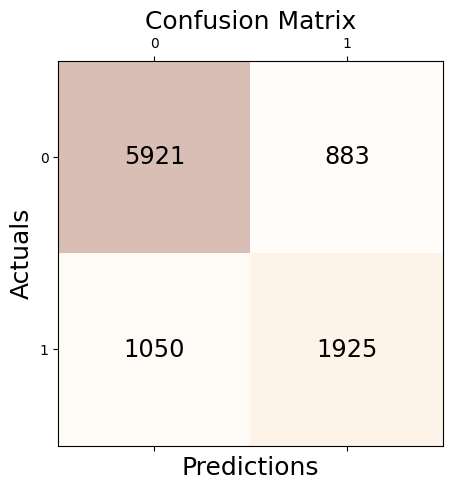

In [ ]:
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = model.predict(x_test_preprocessed)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Print the accuracy rounded to 2 decimal digits
print(f"Validation accuracy: {round(accuracy, 2)}")

Validation accuracy: 0.8


In [ ]:
original_accuracy = accuracy
original_accuracy


0.8023315267409755

# Question 4

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Validation accuracy: 0.80

In [ ]:
# Loop over each feature and train a model without it
# Iterate over each feature
# Initialize an empty list to store the feature importances
feature_importances = []
feature_accuracy = []

for i in range(x_train.shape[1]):
    # Remove the current feature from the training and testing sets
    x_train_without_feature = np.delete(x_train_preprocessed, i, axis=1)
    x_test_without_feature = np.delete(x_test_preprocessed, i, axis=1)

    # Train a logistic regression model on the updated training set
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

   # Fit the pipeline on the training dataset
    model.fit(x_train_without_feature, y_train)

    # Evaluate the model's performance on the updated testing set
    y_pred = model.predict(x_test_without_feature)
    accuracy = accuracy_score(y_test, y_pred)

     # Calculate the difference between the original accuracy and the accuracy without the i-th feature
    difference = original_accuracy - accuracy

    # Record the model's performance metric for the current feature
    feature_importances.append(difference)
    feature_accuracy.append(accuracy)

# Print the feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i} ({x_train.columns[i]}) : accuracy = {feature_accuracy[i]} , importance = {importance} ")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature 0 (neighbourhood_group) : accuracy = 0.8008998875140607 , importance = 0.0014316392269148048 
Feature 1 (room_type) : accuracy = 0.7897535535330811 , importance = 0.012577973207894444 
Feature 2 (latitude) : accuracy = 0.8018202270170774 , importance = 0.0005112997238980732 
Feature 3 (longitude) : accuracy = 0.8019224869618571 , importance = 0.00040903977911843636 
Feature 4 (minimum_nights) : accuracy = 0.8020247469066367 , importance = 0.0003067798343387995 
Feature 5 (number_of_reviews) : accuracy = 0.8015134471827385 , importance = 0.0008180795582369838 
Feature 6 (reviews_per_month) : accuracy = 0.7848450761836588 , importance = 0.01748645055731668 
Feature 7 (calculated_host_listings_count) : accuracy = 0.8023315267409755 , importance = 0.0 
Feature 8 (availability_365) : accuracy = 0.8023315267409755 , importance = 0.0 


# Question 5

Which of the following feature has the smallest difference?

neighbourhood_group - **0.0014316392269148048**

room_type - **0.012577973207894444**

number_of_reviews - **0.0008180795582369838**

reviews_per_month - **0.01748645055731668**


**number_of_reviews has the smallest difference in the overall accuracy from the above list**



In [ ]:
# Define a list of classifiers to test
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]


In [ ]:
from sklearn.metrics import roc_curve, auc
top_models = {}

# Iterate over the classifiers and fit them to the training data
for classifier in classifiers:
    classifier.fit(x_train_preprocessed, y_train)
    
    # Predict the probabilities for the test data
    y_prob = classifier.predict_proba(x_test_preprocessed)[:, 1]
    
    # Calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Print the ROC AUC score for the classifier
    print(f"{type(classifier).__name__} ROC AUC score: {roc_auc}")

    #save the model to a Map
    top_models[type(classifier).__name__] = roc_auc

    # Assuming y_test and y_prob are your test set labels and predicted probabilities, respectively
    # fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    # roc_auc = auc(fpr, tpr)

    # # Plot the ROC curve
    # plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    # plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic')
    # plt.legend(loc="lower right")
    # plt.show()

LogisticRegression ROC AUC score: 0.86566680993385
DecisionTreeClassifier ROC AUC score: 0.7374089882866727
RandomForestClassifier ROC AUC score: 0.8973855468113172
GradientBoostingClassifier ROC AUC score: 0.8954596406463821


In [ ]:
top_models

{'LogisticRegression': 0.86566680993385,
 'DecisionTreeClassifier': 0.7374089882866727,
 'RandomForestClassifier': 0.8973855468113172,
 'GradientBoostingClassifier': 0.8954596406463821}

In [ ]:
top_models_sorted = dict(sorted(top_models.items(), key=lambda x: x[1], reverse=True))
top_models_sorted

{'RandomForestClassifier': 0.8973855468113172,
 'GradientBoostingClassifier': 0.8954596406463821,
 'LogisticRegression': 0.86566680993385,
 'DecisionTreeClassifier': 0.7374089882866727}

# Question 6

For this question, use the Classification template and identify the top 3 models based on ROC_AUC score.

RandomForestClassifier ROC AUC score: 0.8969076519496687

GradientBoostingClassifier ROC AUC score: 0.8954949634174658

LogisticRegression ROC AUC score: 0.86566680993385

In [ ]:
np.log(0)

<ipython-input-268-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# split data into training and validation sets
original_df = df.drop('above_average', axis=1)
x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(original_df.drop('price', axis=1), np.log(original_df['price']+ 0.0001), test_size=0.2, random_state=42)


In [ ]:
# Fit and transform the training set
x_log_train_preprocessed = preprocessor.fit_transform(x_log_train)

# Transform the testing set
x_log_test_preprocessed = preprocessor.transform(x_log_test)

In [ ]:
# try different values of alpha and find the one with the best RMSE on the validation set
best_alpha = None
best_rmse = float('inf')
alpha_values = [0, 0.01, 0.1, 1, 10]
for alpha in alpha_values:
    # create a Ridge regression object with the given alpha
    ridge_reg = Ridge(alpha=alpha)
    # fit the Ridge regression model on the training data
    ridge_reg.fit(x_log_train_preprocessed, y_log_train)
    # make predictions on the validation set
    y_pred = ridge_reg.predict(x_log_test_preprocessed)
    # calculate RMSE on the validation set
    rmse = np.sqrt(mean_squared_error(y_log_test, y_pred))

    print(f"Alpha = {alpha}, RMSE = {rmse}")
    # update the best alpha and RMSE if necessary
    if rmse < best_rmse:
        best_alpha = alpha
        best_rmse = rmse

Alpha = 0, RMSE = 0.5230620883420141
Alpha = 0.01, RMSE = 0.5231452527066957
Alpha = 0.1, RMSE = 0.5231449141350799
Alpha = 1, RMSE = 0.5231416033987973
Alpha = 10, RMSE = 0.5231155221433349


In [ ]:
# print the best alpha and corresponding RMSE
print("Best alpha:", best_alpha)
print("Best RMSE:", round(best_rmse, 3))

Best alpha: 0
Best RMSE: 0.523


# Question 7

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

**Best alpha:** 0

**Best RMSE:** 0.523

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [ ]:
# Resampling
resample_df = df.drop('price', axis=1)
x_resamp_train, x_resamp_test, y_resamp_train, y_resamp_test = train_test_split(resample_df.drop('above_average', axis=1), resample_df['above_average'], test_size=0.3, random_state=123)

In [ ]:
# Check if the values in y train are balanced
value_counts = y_resamp_train.value_counts()
percentages = value_counts / len(y_resamp_train) * 100

print(percentages)
print(value_counts)

0    69.631274
1    30.368726
Name: above_average, dtype: float64
0    23832
1    10394
Name: above_average, dtype: int64


In [ ]:
# Oversampling - Balancing the dataset
!pip install smote-variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.4/407.4 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=29ed84b65f4fc7c7915faa2157fe93b2be77620b3bf0d1acf47be5fb0c0c0b46
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=244995cc3d8e395c85651e171c85d3bf820299dc3fe515e237fd347470239fbc
  Stored in directory: /root/.cache/pip/wheels/26/3c/70/9467407f3aa90862061eadcd286627b23a8bab6789b667776f
Successfully built minisom statistics


In [ ]:
# Instantiating the SMOTE class
import smote_variants as sv
import numpy as np
oversampler= sv.SMOTE()

In [ ]:
# Creating new balanced training set
x_train_os, y_train_os = oversampler.sample(np.array(preprocessor.fit_transform(x_resamp_train)), np.array(y_resamp_train))

2023-04-04 20:55:52,496:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-04-04 20:55:52,503:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-04-04 20:55:52,525:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-04-04 20:55:53,078:INFO:SMOTE: simplex sampl

In [ ]:
# Assuming y_train is a Numpy array
value_counts = pd.Series(y_train_os).value_counts()
percentages = value_counts / len(y_train_os) * 100

print(percentages)
print(value_counts)

0    50.0
1    50.0
dtype: float64
0    23832
1    23832
dtype: int64


In [ ]:
# Fit the balanced dataset to model
model.fit(x_train_os, y_train_os)

In [ ]:
# train the model with new balanced data
X_testNew_preprocessed = preprocessor.fit_transform(x_resamp_test)
y_pred = model.predict(X_testNew_preprocessed)

In [ ]:
# Calculate accuracy score of balanced data
model.score(X_testNew_preprocessed, y_resamp_test)

# Calculate the accuracy on the validation dataset
accuracy = accuracy_score(y_resamp_test, y_pred)

accuracy

0.7586747562887722

In [ ]:
print(f"Balanced Dataset(SMOT) Accuracy {accuracy} | Unbalanced Dataset Accuracy = {original_accuracy}")

Balanced Dataset(SMOT) Accuracy 0.7586747562887722 | Unbalanced Dataset Accuracy = 0.8023315267409755
